### Problem Description :

* Employee Attrition is a huge problem across industries and generally costs the company a lot for
  hiring, retraining, productivity and work loss for each employee who leaves.
  
### Anlaytics Objectives :

* To create an analytical and modelling framework to predict whether an employee will leave
  the company or not based on the quantitative and qualitative features provided in the datasets.
* The firm is also interested in specific features that are highly indicative of attrition.

### Attribute details :

* EmployeeID : A unique identification key for every individual employee
* TotalWorkingHours : The total working hours logged for the employee at the location
* Billable_Hours : The number of hours that are used to charge the Client
* Hours_off_Duty : Number of hours the employee took off
* Touring_Hours : Number of hours the employee spent working at an offsite location
* NoOfProjects : Number of Projects the employee is assigned to
* ActualTimeSpent : Actual time the employee spent working according to the timesheets

### Employee_data :

#### Specific data regarding Employees for both Train and Test data
* EmployeeID : A unique identification key for every individual employee
* Job_History : A feature containing the previous companies where the employee was employed
* Joining_Date : The date on which the employee Joined the organisation
* Designation : The role of the employee in the company, with the following levels: EVP, Junior, MD,
  Senior, VP
* Sex : The gender of the employee

### Target :

* ‘Left_Company’ is the target variable and have to predict either ‘1’ (Left), ‘0’(Retained).

### Importing Libreries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
PATH = os.getcwd()
print(PATH)

C:\Users\kk\Desktop\Yasin\Mith_Exam\Mith


## Reading train data

In [7]:
train_data_attr = pd.read_csv("train_attrition.csv", header=0, sep=',')
train_data_work = pd.read_csv("train_work.csv", header=0, sep=',')
data_employee = pd.read_csv("employee_data.csv", header=0, sep=',')

## Reading Test Data

In [8]:
test_data_attr = pd.read_csv("test_attrition.csv", header=0, sep=',')
test_data_work = pd.read_csv("test_work.csv", header=0, sep=',')

### Checking Columns 

In [9]:
train_data_attr.columns

Index(['EmployeeID', 'Left_Company'], dtype='object')

In [10]:
data_employee.columns

Index(['EmployeeID', 'Job_History', 'Joining_Date', 'Designation', 'Sex'], dtype='object')

In [11]:
train_data_work.columns

Index(['EmployeeID', 'TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent'],
      dtype='object')

### Checking Shape

In [13]:
print(train_data_attr.shape)
print(train_data_work.shape)
print(data_employee.shape)

(245, 2)
(3983, 7)
(296, 5)


In [14]:
train_data_work.head(5)

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-1,184.0,144.0,40.0,144.0,3,77
1,emp-1,176.0,136.0,40.0,136.0,2,98
2,emp-1,200.0,120.0,72.0,120.0,1,14
3,emp-1,160.0,144.0,8.0,144.0,3,147
4,emp-1,171.0,135.0,0.0,135.0,1,42


In [15]:
# There are duplicates in the train_data_work
train_main = train_data_work.groupby('EmployeeID').sum().reset_index()
print(train_main.shape)
train_main.head(5)

(245, 7)


,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-1,3424.0,2462.0,408.0,2462.0,42,2849
1,emp-10,2006.0,1274.0,328.0,691.0,13,616
2,emp-100,3607.0,3275.0,224.0,3235.0,23,3388
3,emp-101,4109.5,2759.5,192.0,0.0,18,1953
4,emp-102,3790.0,2720.5,344.0,1861.0,20,2254


In [16]:
# There are duplicates in test_data_work
test_main = test_data_work.groupby('EmployeeID').sum().reset_index()
print(test_main.shape)
test_main.head(5)

(51, 7)


,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-106,3309.5,2352.0,298.0,2.0,18,1736
1,emp-112,3178.5,2610.0,292.0,325.0,21,1708
2,emp-114,3072.5,1618.7,264.0,1104.0,25,882
3,emp-118,2400.0,2008.0,146.0,728.0,18,1526
4,emp-12,4491.0,2653.0,601.0,799.0,31,1883


## Merging Train data

In [21]:
train_data1= pd.merge(train_main, train_data_attr, how="left", on="EmployeeID")
print(train_data1.shape)

(245, 8)


In [22]:
train_data1.head(5)

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Left_Company
0,emp-1,3424.0,2462.0,408.0,2462.0,42,2849,0.0
1,emp-10,2006.0,1274.0,328.0,691.0,13,616,1.0
2,emp-100,3607.0,3275.0,224.0,3235.0,23,3388,0.0
3,emp-101,4109.5,2759.5,192.0,0.0,18,1953,0.0
4,emp-102,3790.0,2720.5,344.0,1861.0,20,2254,0.0


In [24]:
train_data = pd.merge(train_data1,data_employee, how="left",on="EmployeeID")
print(train_data.shape)

(245, 12)


In [43]:
train_data.head(25)

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Left_Company,Job_History,Joining_Date,Designation,Sex
0,emp-1,3424.000000,2462.000000,408.0,2462.000000,42,2849,0.0,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1
1,emp-10,2006.000000,1274.000000,328.0,691.000000,13,616,1.0,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0
2,emp-100,3607.000000,3275.000000,224.0,3235.000000,23,3388,0.0,"Worked at Company - 562 , Company - 319",2011_12,Senior,1
3,emp-101,4109.500000,2759.500000,192.0,0.000000,18,1953,0.0,"Worked at Company - 212 , Company - 668 , Comp...",2012_01,Senior,1
4,emp-102,3790.000000,2720.500000,344.0,1861.000000,20,2254,0.0,Worked at Company - 234,2011_12,Senior,1
5,emp-103,3191.500000,2797.000000,213.0,2797.000000,20,2366,0.0,"Worked at Company - 165 , Company - 597 , Comp...",2011_12,Senior,1
6,emp-104,3906.000000,3279.000000,256.0,3006.000000,24,1715,0.0,Worked at Company - 258,2011_12,Senior,1
7,emp-105,3301.000000,2169.000000,198.0,1203.000000,18,553,0.0,"Worked at Company - 780 , Company - 703",2012_01,VP,1
8,emp-107,2241.500000,798.000000,196.0,798.000000,7,245,0.0,"Worked at Company - 99 , Company - 569 , Compa...",2012_02,EVP,1
9,emp-108,2715.599998,1059.099998,316.0,0.000000,10,735,1.0,"Worked at Company - 205 , Company - 373 , Comp...",2012_01,VP,1


### Train columns

In [29]:
train_data.columns

Index(['EmployeeID', 'TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Left_Company',
       'Job_History', 'Joining_Date', 'Designation', 'Sex'],
      dtype='object')

### Train shape

In [30]:
train_data.shape

(245, 12)

### Extracting Year & month

In [44]:
import datetime

In [51]:
# df['month'] = pd.DatetimeIndex(df['birth_date']).month
train_data['month'] = pd.DatetimeIndex(train_data['Joining_Date']).month

ValueError: ('Unknown string format:', '2011_01')

In [50]:
# df['year'] = pd.DatetimeIndex(df['birth_date']).year
train_data['year'] = pd.DatetimeIndex(train_data['Joining_Date']).year

ValueError: ('Unknown string format:', '2011_01')

### Checking for Null Values

In [31]:
train_data.isnull().sum()

EmployeeID           0
TotalWorkingHours    0
Billable_Hours       0
Hours_off_Duty       0
Touring_Hours        0
NoOfProjects         0
ActualTimeSpent      0
Left_Company         0
Job_History          0
Joining_Date         0
Designation          0
Sex                  0
dtype: int64

### Checking Train Data types

In [13]:
train_data.dtypes

EmployeeID            object
TotalWorkingHours    float64
Billable_Hours       float64
Hours_off_Duty       float64
Touring_Hours        float64
NoOfProjects           int64
ActualTimeSpent        int64
Job_History           object
Joining_Date          object
Designation           object
Sex                    int64
Left_Company         float64
dtype: object

In [ ]:
cat_data = list(train_data.select_dtypes(include=['object']).columns)

In [36]:
train_data['Job_History'].nunique()

245

In [39]:
train_data['Designation'].nunique()

5

In [37]:
train_data['Designation'].value_counts()

Junior    79
VP        63
Senior    63
EVP       28
MD        12
Name: Designation, dtype: int64

In [ ]:
num_data = list(train_data.select_dtypes(include=['int64', 'float64']).columns)

In [14]:
cat_data = ['Designation', 'sex']

In [15]:
for col in cat_data:
    train_data[col] = train_data[col].astype('category')

In [16]:
train_data['EmployeeID'] = train_data['EmployeeID'].astype('category')

In [63]:
train_data['Joining_Date'] = train_data['Joining_Date'].astype('category')

In [64]:
train_data.dtypes

EmployeeID            category
TotalWorkingHours      float64
Billable_Hours         float64
Hours_off_Duty         float64
Touring_Hours          float64
NoOfProjects             int64
ActualTimeSpent          int64
Joining_Date          category
Sex                      int64
Left_Company           float64
Designation_Junior       uint8
Designation_MD           uint8
Designation_Senior       uint8
Designation_VP           uint8
dtype: object

In [18]:
train_data.columns

Index(['EmployeeID', 'TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Job_History',
       'Joining_Date', 'Designation', 'Sex', 'Left_Company'],
      dtype='object')

In [19]:
num_data

['TotalWorkingHours',
 'Billable_Hours',
 'Hours_off_Duty',
 'Touring_Hours',
 'NoOfProjects',
 'ActualTimeSpent',
 'Sex',
 'Left_Company']

In [20]:
cat_data

['Job_History', 'Designation']

In [21]:
train_data.NoOfProjects.value_counts()

1    2610
2     775
0     350
3     163
4      56
5      23
6       5
7       1
Name: NoOfProjects, dtype: int64

In [22]:
train_data.dtypes

EmployeeID           category
TotalWorkingHours     float64
Billable_Hours        float64
Hours_off_Duty        float64
Touring_Hours         float64
NoOfProjects            int64
ActualTimeSpent         int64
Job_History          category
Joining_Date           object
Designation          category
Sex                     int64
Left_Company          float64
dtype: object

## Dropping Unwanted columns

In [23]:
train_data_employee.Job_History.value_counts()

Worked at Company - 616                                                                                    2
Worked at Company - 83 , Company - 543                                                                     1
Worked at Company - 550                                                                                    1
Worked at Company - 477 , Company - 326 , Company - 760 , Company - 310                                    1
Worked at Company - 19 , Company - 430 , Company - 549                                                     1
Worked at Company - 716 , Company - 80 , Company - 569 , Company - 7                                       1
Worked at Company - 410 , Company - 326                                                                    1
Worked at Company - 639 , Company - 212 , Company - 314                                                    1
Worked at Company - 185 , Company - 137                                                                    1
Worked at Company -

In [24]:
train_data.drop(['Job_History'], axis=1, inplace=True)

In [25]:
cat_data.remove('Job_History')

In [26]:
cat_data

['Designation']

In [27]:
num_data

['TotalWorkingHours',
 'Billable_Hours',
 'Hours_off_Duty',
 'Touring_Hours',
 'NoOfProjects',
 'ActualTimeSpent',
 'Sex',
 'Left_Company']

In [28]:
train_data.columns

Index(['EmployeeID', 'TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Joining_Date',
       'Designation', 'Sex', 'Left_Company'],
      dtype='object')

In [29]:
train_data.describe()

,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Sex,Left_Company
count,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000,3983.000000
mean,188.316068,129.016495,16.097665,65.400829,1.261612,94.390158,0.876224,0.107959
std,47.563578,66.432245,22.518071,79.741804,0.798259,80.291680,0.329367,0.310367
min,20.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,84.000000,0.000000,0.000000,1.000000,35.000000,1.000000,0.000000
50%,188.800000,145.000000,8.000000,0.000000,1.000000,77.000000,1.000000,0.000000
75%,216.500000,176.000000,20.000000,144.500000,2.000000,139.000000,1.000000,0.000000
max,404.000000,333.000000,160.000000,333.500000,7.000000,574.000000,1.000000,1.000000


In [30]:
train_data.describe(include='object')

,Joining_Date
count,3983
unique,55
top,2012_02
freq,230


In [31]:
train_data.Left_Company.value_counts()

0.0    3553
1.0     430
Name: Left_Company, dtype: int64

## Merging Test Data

In [32]:
test_data= pd.merge(test_data_work,test_data_employee, how="left", on="EmployeeID")

In [33]:
test_data.head()

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Job_History,Joining_Date,Designation,Sex
0,emp-2,170.0,124.0,8.0,0.0,4,77,"Worked at Company - 305 , Company - 764 , Comp...",2005_12,EVP,1
1,emp-2,164.0,114.0,24.0,0.0,4,105,"Worked at Company - 305 , Company - 764 , Comp...",2005_12,EVP,1
2,emp-2,201.0,139.0,48.0,0.0,4,112,"Worked at Company - 305 , Company - 764 , Comp...",2005_12,EVP,1
3,emp-2,153.0,114.0,24.0,0.0,2,91,"Worked at Company - 305 , Company - 764 , Comp...",2005_12,EVP,1
4,emp-2,122.0,106.0,0.0,0.0,2,98,"Worked at Company - 305 , Company - 764 , Comp...",2005_12,EVP,1


In [34]:
test_data.isnull().sum()

EmployeeID           0
TotalWorkingHours    0
Billable_Hours       0
Hours_off_Duty       0
Touring_Hours        0
NoOfProjects         0
ActualTimeSpent      0
Job_History          0
Joining_Date         0
Designation          0
Sex                  0
dtype: int64

In [35]:
test_data.columns

Index(['EmployeeID', 'TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Job_History',
       'Joining_Date', 'Designation', 'Sex'],
      dtype='object')

In [36]:
test_data.dtypes

EmployeeID            object
TotalWorkingHours    float64
Billable_Hours       float64
Hours_off_Duty       float64
Touring_Hours        float64
NoOfProjects           int64
ActualTimeSpent        int64
Job_History           object
Joining_Date          object
Designation           object
Sex                    int64
dtype: object

In [37]:
test_data.shape

(874, 11)

In [38]:
cat_data = ['Job_History','Designation']

In [39]:
for col in cat_data:
    test_data[col] = test_data[col].astype('category')
    

In [40]:
test_data['EmployeeID'] = test_data['EmployeeID'].astype('category')

In [65]:
test_data['Joining_Date'] = test_data['Joining_Date'].astype('category')

In [41]:
num_data = list(test_data.select_dtypes(include=['int64', 'float64']).columns)

## Dropping unwanted columns

In [42]:
test_data.drop(['Job_History'], axis=1, inplace=True)

In [53]:
cat_data.remove('Job_History')

In [54]:
cat_data

['Designation']

In [44]:
num_data

['TotalWorkingHours',
 'Billable_Hours',
 'Hours_off_Duty',
 'Touring_Hours',
 'NoOfProjects',
 'ActualTimeSpent',
 'Sex']

## Visualisation

In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
corr=train_data[num_data].corr()


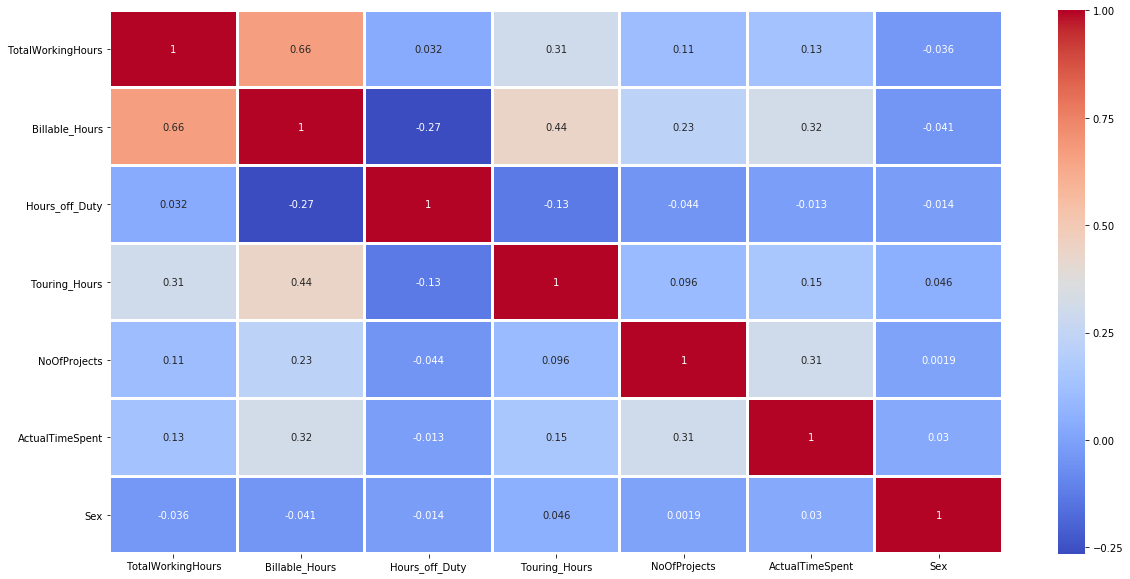

In [47]:
#Not much correlation found
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corr,cmap='coolwarm',ax=ax,annot=True,linewidths=2)

In [4]:
train_data.groupby(['Sex','Left_Company']).size().unstack().plot(kind='bar', title="Sex&Left_company", figsize=(25,8))
plt.ylabel('count')
plt.title('Sex vs. Left_Company');

NameError: name 'train_data' is not defined

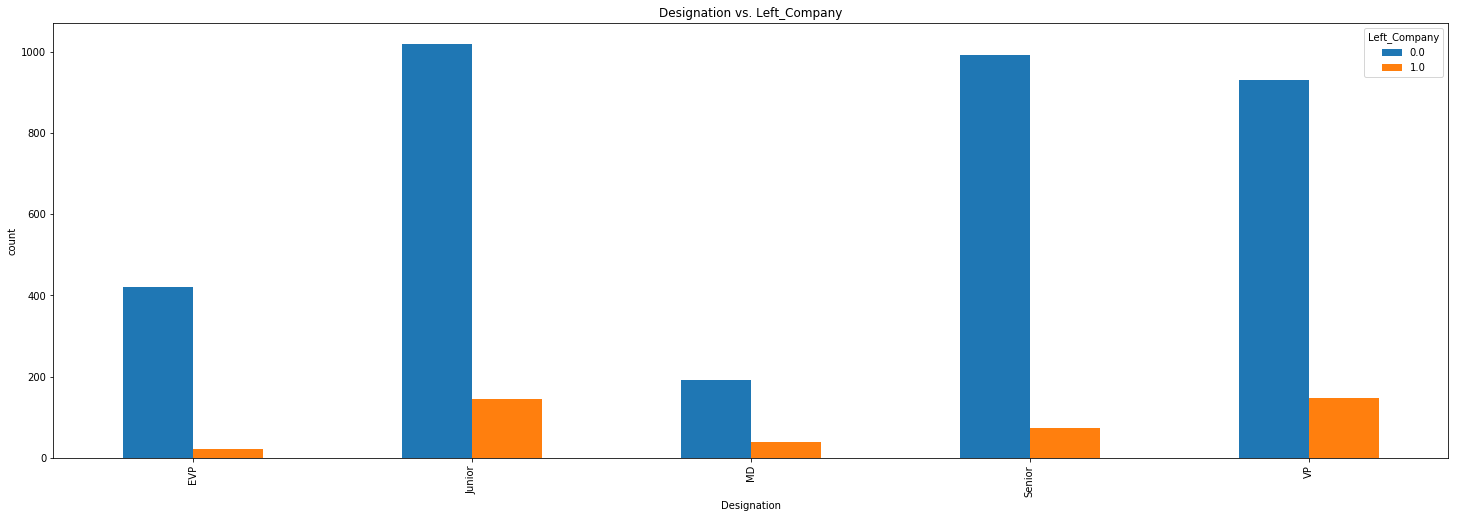

In [49]:
train_data.groupby(['Designation','Left_Company']).size().unstack().plot(kind='bar', title="Designation&Left_Company", figsize=(25,8))
plt.ylabel('count')
plt.title('Designation vs. Left_Company');

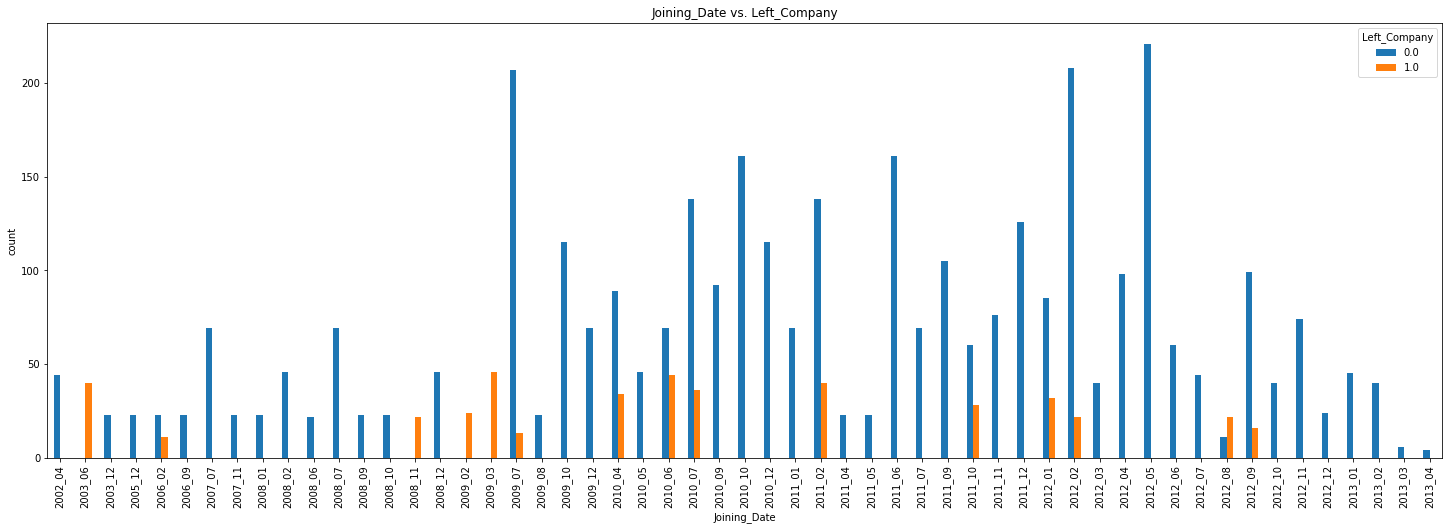

In [50]:
train_data.groupby(['Joining_Date','Left_Company']).size().unstack().plot(kind='bar', title="Joining_Date", figsize=(25,8))
plt.ylabel('count')
plt.title('Joining_Date vs. Left_Company'); #(0 -'Joining Date' , 1 -'Left Company')

## Dummying Train and Test

In [55]:
train_data = pd.get_dummies(train_data, columns=cat_data, drop_first=True)

In [56]:
train_data.head()

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Joining_Date,Sex,Left_Company,Designation_Junior,Designation_MD,Designation_Senior,Designation_VP
0,emp-1,184.0,144.0,40.0,144.0,3,77,2011_01,1,0.0,0,1,0,0
1,emp-1,176.0,136.0,40.0,136.0,2,98,2011_01,1,0.0,0,1,0,0
2,emp-1,200.0,120.0,72.0,120.0,1,14,2011_01,1,0.0,0,1,0,0
3,emp-1,160.0,144.0,8.0,144.0,3,147,2011_01,1,0.0,0,1,0,0
4,emp-1,171.0,135.0,0.0,135.0,1,42,2011_01,1,0.0,0,1,0,0


In [57]:
train_data.isnull().sum()

EmployeeID            0
TotalWorkingHours     0
Billable_Hours        0
Hours_off_Duty        0
Touring_Hours         0
NoOfProjects          0
ActualTimeSpent       0
Joining_Date          0
Sex                   0
Left_Company          0
Designation_Junior    0
Designation_MD        0
Designation_Senior    0
Designation_VP        0
dtype: int64

In [58]:
test_data = pd.get_dummies(test_data, columns=cat_data, drop_first=True)

In [59]:
test_data.head()

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Joining_Date,Sex,Designation_Junior,Designation_MD,Designation_Senior,Designation_VP
0,emp-2,170.0,124.0,8.0,0.0,4,77,2005_12,1,0,0,0,0
1,emp-2,164.0,114.0,24.0,0.0,4,105,2005_12,1,0,0,0,0
2,emp-2,201.0,139.0,48.0,0.0,4,112,2005_12,1,0,0,0,0
3,emp-2,153.0,114.0,24.0,0.0,2,91,2005_12,1,0,0,0,0
4,emp-2,122.0,106.0,0.0,0.0,2,98,2005_12,1,0,0,0,0


In [60]:
test_data.isnull().sum()

EmployeeID            0
TotalWorkingHours     0
Billable_Hours        0
Hours_off_Duty        0
Touring_Hours         0
NoOfProjects          0
ActualTimeSpent       0
Joining_Date          0
Sex                   0
Designation_Junior    0
Designation_MD        0
Designation_Senior    0
Designation_VP        0
dtype: int64

In [61]:
train_data.shape

(3983, 14)

In [62]:
test_data.shape

(874, 13)

In [ ]:
## Scaling on numerical

In [66]:
# from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train_data.loc[:,num_data])

train_data.loc[:,num_data] = sc.transform(train_data.loc[:,num_data])
test_data.loc[:,num_data] = sc.transform(test_data.loc[:,num_data])

## modelling

In [71]:
X = train_data.loc[:, train_data.columns != 'Left_Company']
y = train_data['Left_Company']

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [73]:
X_train.shape

(3186, 13)

In [81]:
X_train.isnull().sum().sum()

0

In [82]:
y_train.isnull().sum().sum()

0

In [74]:
X_test.shape

(797, 13)

In [75]:
y_train.shape

(3186,)

In [76]:
y_test.shape

(797,)

In [77]:
y_train.mean()

0.10797237915881984

In [78]:
y_test.mean()

0.10790464240903387

## modelling

### Decision Trees

In [87]:
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error


In [68]:
## Building Decision Tree
from sklearn import tree

In [69]:
clf = tree.DecisionTreeClassifier(max_depth=7)

In [83]:
X_train.drop(['EmployeeID'], axis=1, inplace=True)

In [92]:
X_test.drop(['EmployeeID'], axis=1, inplace=True)

In [84]:
%time clf.fit(X_train, y_train)

Wall time: 19 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [85]:
#train prediction
y1_pred_ = clf.predict(X_train)

In [88]:
print(accuracy_score(y_train,y1_pred_))

0.9626490897677339


In [93]:
#evaluation data prediction
y_pred_ = clf.predict(X_test)

In [94]:
print(accuracy_score(y_test,y_pred_))

0.9510664993726474


## feture importances

In [2]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([train_data.columns[indices],np.sort(importances)[::-1]])

NameError: name 'clf' is not defined

In [3]:
#Grid Search for Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

In [109]:
dt = tree.DecisionTreeClassifier()
dt_model = GridSearchCV(dt, param_grid, cv=10)

In [110]:
%time dt_model.fit(X_train, y_train)

Wall time: 2min 50s


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                     

In [103]:
# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20,25],
              "max_depth": [4,5,6,7,8],
              "min_samples_leaf": [1,2,3,5,8,10],
              "max_leaf_nodes": [2,3,4,6,8,10],
              }

In [111]:
dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [112]:
y1_pred_ = dt_model.predict(X_train)

In [113]:
#Accuracy against train data
print(accuracy_score(y_train,y1_pred_))
print("\n")

0.9256120527306968




In [114]:
#Accuracy against eval data
y_pred_ = dt_model.predict(X_test)

In [116]:
print(accuracy_score(y_test,y_pred_))

0.9234629861982434


In [122]:
test_data.drop(['EmployeeID'], axis=1, inplace=True)

In [123]:
### For TEST Dataset prediction
y_pred_test_dt=dt_model.predict(test_data) 

In [124]:
y_pred_test_dt

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [126]:
## dec trees confusio matrix

print(classification_report(y_train,y1_pred_))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2842
         1.0       1.00      0.31      0.47       344

    accuracy                           0.93      3186
   macro avg       0.96      0.66      0.72      3186
weighted avg       0.93      0.93      0.91      3186



In [127]:
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       711
         1.0       1.00      0.29      0.45        86

    accuracy                           0.92       797
   macro avg       0.96      0.65      0.70       797
weighted avg       0.93      0.92      0.90       797

